<a href="https://colab.research.google.com/github/AI4ALL-Class8-Group2/offensive-standard-data/blob/main/1_0_Apply_AI_Group8_2_Gun_Violence_Incident_Fatality_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title**

Gun Violence Incident Fatality Predictor

**Introduction**

This project seeks to determine the fatality of gun violence incidents. The initial dataset comprised of data from 22 Police Departments across the United States.

Dataset - https://github.com/the-trace-and-buzzfeed-news/local-police-data-analysis



**4 PDs Dataset used**
*   Baltimore PD
*   Boston PD
*   Los Angeles PD
*   San Francisco PD

**162,47 rows and 17 columns**

**Data Selection**
1.	All have ‘Non-Fatal Shooting’ and ‘Homicide-Gun’ variables under ‘offence_group’ column except Los Angeles.
2.	Los Angeles has ‘Homicide-Criminal-Fatal-Shooting’ and ‘Agg Assault - Shooting - Non-Fatal’ under ‘offence_category’.

**Fatal** means ‘Homicide-Gun’ (as recorded by Baltimore PD, Boston PD, Newark PD, San Francisco PD) and ‘Homicide-Criminal-Fatal-Shooting’ (as recorded Los Angeles PD)

**Non-Fatal** means ‘‘Non-Fatal Shooting’ (as recorded by Baltimore PD, Boston PD, Newark PD, San Francisco PD) and ‘Agg Assault - Shooting - Non-Fatal’ (as recorded by Los Angeles PD)

**N0TE** Research started with 5 PDs but Newark-PD was dropped after further analysis

In [1]:
#import library and load dataset
import pandas as pd
data = pd.read_csv(r'https://raw.githubusercontent.com/AI4ALL-Class8-Group2/offensive-standard-data/connor-branch/offenses_fatality_final_1.0.csv')


# show the first 5 rows of the data
data.head()

,agency_name,occurred_date,occurred_time,offense_category,weapon,offense_group,gang_activity_ind,victim_age,victim_race,victim_race_condensed,victim_sex,case_status,arrest_ind,clearance_status,clearance_group,Fatality Status
0,BALTIMORE-PD,7/26/2017,UNKNOWN,NON FATAL SHOOTING,FIREARM,Non-Fatal Shooting,UNSPECIFIED,22,BLACK,BLACK/HISPANIC,MALE,OPEN,UNKNOWN,OPEN,Open & No Arrest-Unspecified,Non-Fatal
1,BALTIMORE-PD,7/26/2017,UNKNOWN,NON FATAL SHOOTING,FIREARM,Non-Fatal Shooting,UNSPECIFIED,53,BLACK,BLACK/HISPANIC,FEMALE,OPEN,UNKNOWN,OPEN,Open & No Arrest-Unspecified,Non-Fatal
2,BALTIMORE-PD,7/25/2017,UNKNOWN,NON FATAL SHOOTING,FIREARM,Non-Fatal Shooting,UNSPECIFIED,19,BLACK,BLACK/HISPANIC,MALE,OPEN,UNKNOWN,OPEN,Open & No Arrest-Unspecified,Non-Fatal
3,BALTIMORE-PD,7/25/2017,UNKNOWN,NON FATAL SHOOTING,FIREARM,Non-Fatal Shooting,UNSPECIFIED,29,BLACK,BLACK/HISPANIC,MALE,OPEN,UNKNOWN,OPEN,Open & No Arrest-Unspecified,Non-Fatal
4,BALTIMORE-PD,7/24/2017,UNKNOWN,NON FATAL SHOOTING,FIREARM,Non-Fatal Shooting,UNSPECIFIED,22,BLACK,BLACK/HISPANIC,MALE,OPEN,UNKNOWN,OPEN,Open & No Arrest-Unspecified,Non-Fatal


In [2]:
# show number of rows and columns
print(data.shape)

(16247, 16)


In [3]:
# show data info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16247 entries, 0 to 16246
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   agency_name            16247 non-null  object
 1   occurred_date          16247 non-null  object
 2   occurred_time          16247 non-null  object
 3   offense_category       16247 non-null  object
 4   weapon                 16247 non-null  object
 5   offense_group          16247 non-null  object
 6   gang_activity_ind      16247 non-null  object
 7   victim_age             16247 non-null  int64 
 8   victim_race            16247 non-null  object
 9   victim_race_condensed  16247 non-null  object
 10  victim_sex             16247 non-null  object
 11  case_status            16247 non-null  object
 12  arrest_ind             16247 non-null  object
 13  clearance_status       16247 non-null  object
 14  clearance_group        16247 non-null  object
 15  Fatality Status    

In [4]:
# show feature names
print(data.keys())

Index(['agency_name', 'occurred_date', 'occurred_time', 'offense_category',
       'weapon', 'offense_group', 'gang_activity_ind', 'victim_age',
       'victim_race', 'victim_race_condensed', 'victim_sex', 'case_status',
       'arrest_ind', 'clearance_status', 'clearance_group', 'Fatality Status'],
      dtype='object')


In [5]:
# delete rows with missing values
print(data.shape)
print(data.dropna().shape)

(16247, 16)
(16247, 16)


In [6]:
# duplicate rows
data[data.duplicated(keep=False)]

,agency_name,occurred_date,occurred_time,offense_category,weapon,offense_group,gang_activity_ind,victim_age,victim_race,victim_race_condensed,victim_sex,case_status,arrest_ind,clearance_status,clearance_group,Fatality Status
22,BALTIMORE-PD,7/18/2017,UNKNOWN,NON FATAL SHOOTING,FIREARM,Non-Fatal Shooting,UNSPECIFIED,20,BLACK,BLACK/HISPANIC,MALE,OPEN,UNKNOWN,OPEN,Open & No Arrest-Unspecified,Non-Fatal
25,BALTIMORE-PD,7/18/2017,UNKNOWN,NON FATAL SHOOTING,FIREARM,Non-Fatal Shooting,UNSPECIFIED,20,BLACK,BLACK/HISPANIC,MALE,OPEN,UNKNOWN,OPEN,Open & No Arrest-Unspecified,Non-Fatal
35,BALTIMORE-PD,7/14/2017,UNKNOWN,NON FATAL SHOOTING,FIREARM,Non-Fatal Shooting,UNSPECIFIED,27,BLACK,BLACK/HISPANIC,MALE,OPEN,UNKNOWN,OPEN,Open & No Arrest-Unspecified,Non-Fatal
36,BALTIMORE-PD,7/14/2017,UNKNOWN,NON FATAL SHOOTING,FIREARM,Non-Fatal Shooting,UNSPECIFIED,27,BLACK,BLACK/HISPANIC,MALE,OPEN,UNKNOWN,OPEN,Open & No Arrest-Unspecified,Non-Fatal
85,BALTIMORE-PD,6/25/2017,UNKNOWN,NON FATAL SHOOTING,FIREARM,Non-Fatal Shooting,UNSPECIFIED,24,BLACK,BLACK/HISPANIC,MALE,OPEN,UNKNOWN,OPEN,Open & No Arrest-Unspecified,Non-Fatal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16144,SAN-FRANCISCO-PD,8/9/2013,UNKNOWN,NON-FATAL-SHOOTING,FIREARM,Non-Fatal Shooting,UNSPECIFIED,19,BLACK,BLACK/HISPANIC,MALE,OPEN,N,OPEN,Open & No Arrest-Unspecified,Non-Fatal
16180,SAN-FRANCISCO-PD,1/15/2014,UNKNOWN,NON-FATAL-SHOOTING,FIREARM,Non-Fatal Shooting,UNSPECIFIED,16,BLACK,BLACK/HISPANIC,MALE,OPEN,N,OPEN,Open & No Arrest-Unspecified,Non-Fatal
16181,SAN-FRANCISCO-PD,1/15/2014,UNKNOWN,NON-FATAL-SHOOTING,FIREARM,Non-Fatal Shooting,UNSPECIFIED,16,BLACK,BLACK/HISPANIC,MALE,OPEN,N,OPEN,Open & No Arrest-Unspecified,Non-Fatal
16201,SAN-FRANCISCO-PD,5/11/2014,UNKNOWN,NON-FATAL-SHOOTING,FIREARM,Non-Fatal Shooting,UNSPECIFIED,19,HISPANIC,BLACK/HISPANIC,MALE,OPEN,N,OPEN,Open & No Arrest-Unspecified,Non-Fatal


<Axes: ylabel='count'>

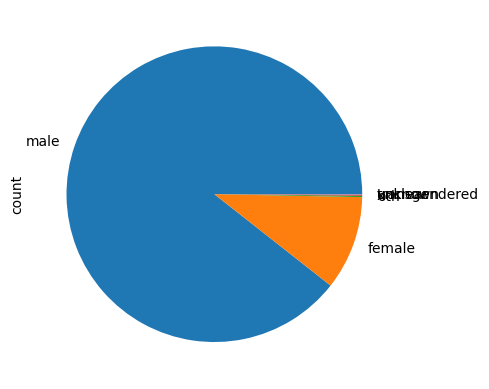

In [7]:
# pie chart for victim_sex
data['victim_sex'].str.lower().value_counts(dropna=False).plot.pie()

In [8]:
# quasi constant values
for val in data.columns.sort_values():
    if (len(data[val].unique()) < 3):
        print(data[val].value_counts())

Fatality Status
Non-Fatal    12130
Fatal         4117
Name: count, dtype: int64


# Categorize victim_age

In [9]:
# A column of name 'age-groupings' is created in DataFrame
# Categorizing Age into 4 Categories
# Baby/Toddler: (0,3], 0 is excluded & 3 is included
# Child: (3,17], 3 is excluded & 17 is included
# Adult: (17,63], 17 is excluded & 63 is included
# Elderly: (63,99], 63 is excluded & 99 is included
data['victim_age_groupings'] = pd.cut(x=data['victim_age'], bins=[0, 3, 17, 63, 99],
                     labels=['Baby/Toddler', 'Child', 'Adult',
                             'Elderly'])

# Printing DataFrame after sorting Continuous to

print(data)

# Check the number of values in each bin
print("Categories: ")
print(data['victim_age_groupings'].value_counts())


            agency_name occurred_date occurred_time    offense_category  \
0          BALTIMORE-PD     7/26/2017       UNKNOWN  NON FATAL SHOOTING   
1          BALTIMORE-PD     7/26/2017       UNKNOWN  NON FATAL SHOOTING   
2          BALTIMORE-PD     7/25/2017       UNKNOWN  NON FATAL SHOOTING   
3          BALTIMORE-PD     7/25/2017       UNKNOWN  NON FATAL SHOOTING   
4          BALTIMORE-PD     7/24/2017       UNKNOWN  NON FATAL SHOOTING   
...                 ...           ...           ...                 ...   
16242  SAN-FRANCISCO-PD     9/21/2014       UNKNOWN  NON-FATAL-SHOOTING   
16243  SAN-FRANCISCO-PD     9/25/2014       UNKNOWN  NON-FATAL-SHOOTING   
16244  SAN-FRANCISCO-PD     10/1/2014       UNKNOWN  NON-FATAL-SHOOTING   
16245  SAN-FRANCISCO-PD     10/1/2014       UNKNOWN  NON-FATAL-SHOOTING   
16246  SAN-FRANCISCO-PD    10/14/2014       UNKNOWN  NON-FATAL-SHOOTING   

        weapon       offense_group gang_activity_ind  victim_age victim_race  \
0      FIREARM  Non

# One-Hot Encoding

In [10]:

#one hot encoding of categorical variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['offense_group', 'Fatality Status','agency_name','victim_race','victim_sex','victim_age_groupings']),
    remainder='passthrough')

transformed = transformer.fit_transform(data)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
print(transformed_df.head())


  onehotencoder__offense_group_Agg Assault - Gun  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

  onehotencoder__offense_group_Homicide - Gun  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

  onehotencoder__offense_group_Non-Fatal Shooting  \
0                                             1.0   
1                                             1.0   
2                                             1.0   
3                                             1.0   
4                                             1.0   

  onehotencoder__Fatality Status_Fatal  \
0                              

In [11]:
transformed_df.keys()

Index(['onehotencoder__offense_group_Agg Assault - Gun',
       'onehotencoder__offense_group_Homicide - Gun',
       'onehotencoder__offense_group_Non-Fatal Shooting',
       'onehotencoder__Fatality Status_Fatal',
       'onehotencoder__Fatality Status_Non-Fatal',
       'onehotencoder__agency_name_BALTIMORE-PD',
       'onehotencoder__agency_name_BOSTON-PD',
       'onehotencoder__agency_name_LOS-ANGELES-PD',
       'onehotencoder__agency_name_SAN-FRANCISCO-PD',
       'onehotencoder__victim_race_ASIAN',
       'onehotencoder__victim_race_ASIAN OR PACIFIC ISLANDER',
       'onehotencoder__victim_race_BLACK',
       'onehotencoder__victim_race_BLACK HISPANIC',
       'onehotencoder__victim_race_BLACK NON-HISPANIC',
       'onehotencoder__victim_race_HISPANIC', 'onehotencoder__victim_race_I',
       'onehotencoder__victim_race_OTH', 'onehotencoder__victim_race_OTHER',
       'onehotencoder__victim_race_UNKNOWN',
       'onehotencoder__victim_race_WHITE',
       'onehotencoder__victim_

<Axes: xlabel='Fatality Status'>

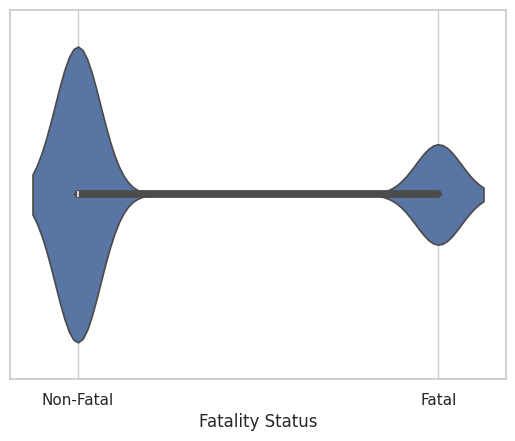

In [12]:
#violin plot
import seaborn

seaborn.set(style = 'whitegrid')

seaborn.violinplot(x ='Fatality Status', data = data)

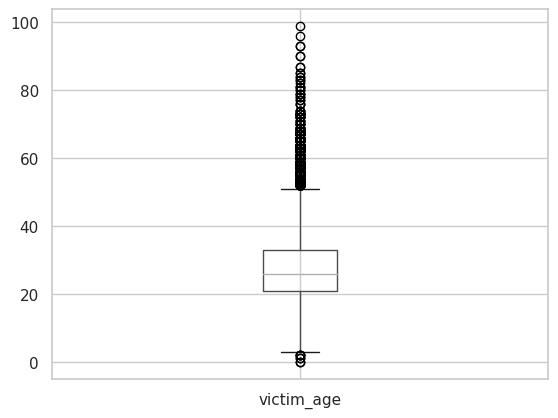

In [13]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
# Creating plot
data.boxplot()

# show plot
plt.show()

<Axes: ylabel='count'>

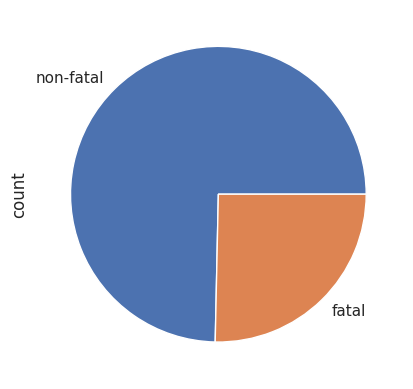

In [14]:
# pie chart
data['Fatality Status'].str.lower().value_counts(dropna=False).plot.pie()

<Axes: ylabel='count'>

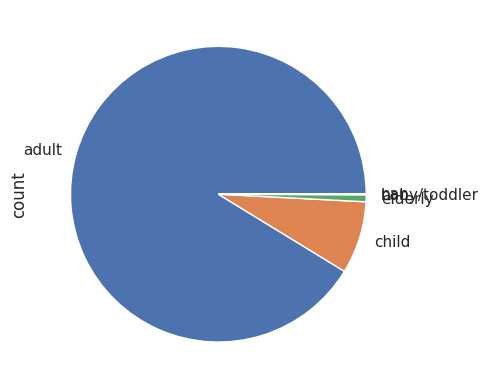

In [15]:
# pie chart
data['victim_age_groupings'].str.lower().value_counts(dropna=False).plot.pie()

# Train Test Split

In [16]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['Fatality Status'], axis=1), data['Fatality Status'], test_size=.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(12997, 16)
(3250, 16)
